## **Notebook PC1_Ativ6**
## Simple recurrent neural networks, MLP or ESN for multi-step time series prediction.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Caio Francisco Garcia de Lima **RA** 195210


In [ ]:
# Loading all the relevant libraries
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

## **A base [unemployment rate] foi baixada no [link](https://fred.stlouisfed.org/series/UNRATE).**

In [ ]:
# Structuring the dataset from a single time series, scaling and spliting into training / testing
def get_train_test(dataset, split_percent, time_steps, horizon):
    df = read_csv(dataset, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    # There is a kind of data leakage in the next command
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    df = DataFrame()
    for i in range(0,time_steps):
      df['t-' + str(time_steps-i-1)] = [data[j] for j in range(i, (len(data)-horizon-time_steps+i+1))]
    for i in range(1,horizon+1):
      df['t+' + str(i)] = [data[j] for j in range(time_steps+i-1, (len(data)-horizon+i))]
    print(df)
    df1 = df.copy()
    for i in range(1,horizon+1):
      df1 = df1.drop(['t+' + str(i)], axis = 1)
    dataX = np.array(df1)
    df2 = df['t+1']
    for i in range(2,horizon+1):
      df2 = pd.concat([df2, df['t+' + str(i)]], axis=1)
    datay = np.array(df2)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    X = dataX[range(split),:]
    y = datay[range(split)]
    Xt = dataX[split:,:]
    yt = datay[split:]
    return X, y, Xt, yt

time_steps = 6
horizon = 3
# Here you will decide which dataset to consider.
X, y, Xt, yt = get_train_test('UNRATE.csv', 0.8, time_steps, horizon)
# X, y, Xt, yt = get_train_test('monthly_sunspot.csv', 0.8, time_steps, horizon)

          t-5       t-4       t-3       t-2       t-1       t-0       t+1  \
0    0.073770  0.106557  0.122951  0.114754  0.081967  0.090164  0.090164   
1    0.106557  0.122951  0.114754  0.081967  0.090164  0.090164  0.114754   
2    0.122951  0.114754  0.081967  0.090164  0.090164  0.114754  0.106557   
3    0.114754  0.081967  0.090164  0.090164  0.114754  0.106557  0.098361   
4    0.081967  0.090164  0.090164  0.114754  0.106557  0.098361  0.106557   
..        ...       ...       ...       ...       ...       ...       ...   
879  0.286885  0.270492  0.278689  0.237705  0.221311  0.180328  0.172131   
880  0.270492  0.278689  0.237705  0.221311  0.180328  0.172131  0.139344   
881  0.278689  0.237705  0.221311  0.180328  0.172131  0.139344  0.114754   
882  0.237705  0.221311  0.180328  0.172131  0.139344  0.114754  0.122951   
883  0.221311  0.180328  0.172131  0.139344  0.114754  0.122951  0.106557   

          t+2       t+3  
0    0.114754  0.106557  
1    0.106557  0.098361

##**Implementing the simple recurrent neural network**

**a) Explique o mecanismo de estruturação da única série temporal em várias colunas(ou seja, várias séries temporais).**

<p align="justify">A rede foi organizada para prever 3 passos a frente, considerando os cinco passos anteriores (incluindo o passo atual), por isso ela está definida em várias séries temporais.</p>

**b) Explique o papel das variáveis [time_steps] e [horizon].**

***time_steps*** representa a quantidade de recorrências da rede.

***horizon*** nos diz quantos passos no futuro queremos prever, então se horizon=4 isso quer dizer que queremos andar 4 passos no futuro.

In [ ]:
# Execute this cell or the MLP cell below or the ESN cell below. They are mutually exclusive.
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, activation=activation[0], input_shape=input_shape))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
model = create_RNN(hidden_units=30, dense_units=horizon, input_shape=(time_steps,1), activation=['tanh', 'tanh'])
train_predict = model.fit(X, y, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
713/713 - 2s - loss: 0.0028 - 2s/epoch - 3ms/step
Epoch 2/20
713/713 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 3/20
713/713 - 1s - loss: 8.9675e-04 - 1s/epoch - 2ms/step
Epoch 4/20
713/713 - 1s - loss: 8.2962e-04 - 1s/epoch - 2ms/step
Epoch 5/20
713/713 - 1s - loss: 7.9625e-04 - 1s/epoch - 2ms/step
Epoch 6/20
713/713 - 1s - loss: 7.2123e-04 - 1s/epoch - 2ms/step
Epoch 7/20
713/713 - 1s - loss: 7.1798e-04 - 1s/epoch - 2ms/step
Epoch 8/20
713/713 - 1s - loss: 7.5741e-04 - 1s/epoch - 2ms/step
Epoch 9/20
713/713 - 1s - loss: 7.2513e-04 - 1s/epoch - 2ms/step
Epoch 10/20
713/713 - 1s - loss: 7.4013e-04 - 1s/epoch - 2ms/step
Epoch 11/20
713/713 - 1s - loss: 7.4624e-04 - 1s/epoch - 2ms/step
Epoch 12/20
713/713 - 1s - loss: 7.0121e-04 - 1s/epoch - 2ms/step
Epoch 13/20
713/713 - 1s - loss: 6.9948e-04 - 1s/epoch - 2ms/step
Epoch 14/20
713/713 - 1s - loss: 7.2494e-04 - 1s/epoch - 2ms/step
Epoch 15/20
713/713 - 1s - loss: 7.0062e-04 - 1s/epoch - 2ms/step
Epoch 16/20
713/713 - 1s - 

**c) Explique o fluxo de informação da figura [RNN_info_flow.png], correspondente à rede neural SimpleRNN, e explique as dimensões da SimpleRNN (última célula do notebook).**

A imagem a seguir ilustra como funciona o processo de recorrência da rede, no caso o time_step=3, ou seja o BPTTT usa 3 desobramentos antes de fornecer o sinal para a camada de saída, produzindo assim uma rede não-recorrente com 3 camadas com pesos compartilhados. As dimensões da última camada representam a forma das matrizes de pesos, wx é o vetor de entrada, wh o estado escondido (hidden-state) e wy o vetor de saída bh e by são os vetores de vieses (bias vectors).

- wx (input) 1 entrada para 30 neurônios
- wh (hiden) matriz 30x30 neurônios, ela contém os pesos das conexões para os inputs do passo atual 
- bh (hidden bias) 30 neurônios contendo o bias de cada neurônio

- wy (output) 30x3 neurônios contendo os pesos de conexões do(s) passo(s) anterior(es)
- by (output bias) 3 neurônios contendo os bias do(s) passo(s) anterior(es)


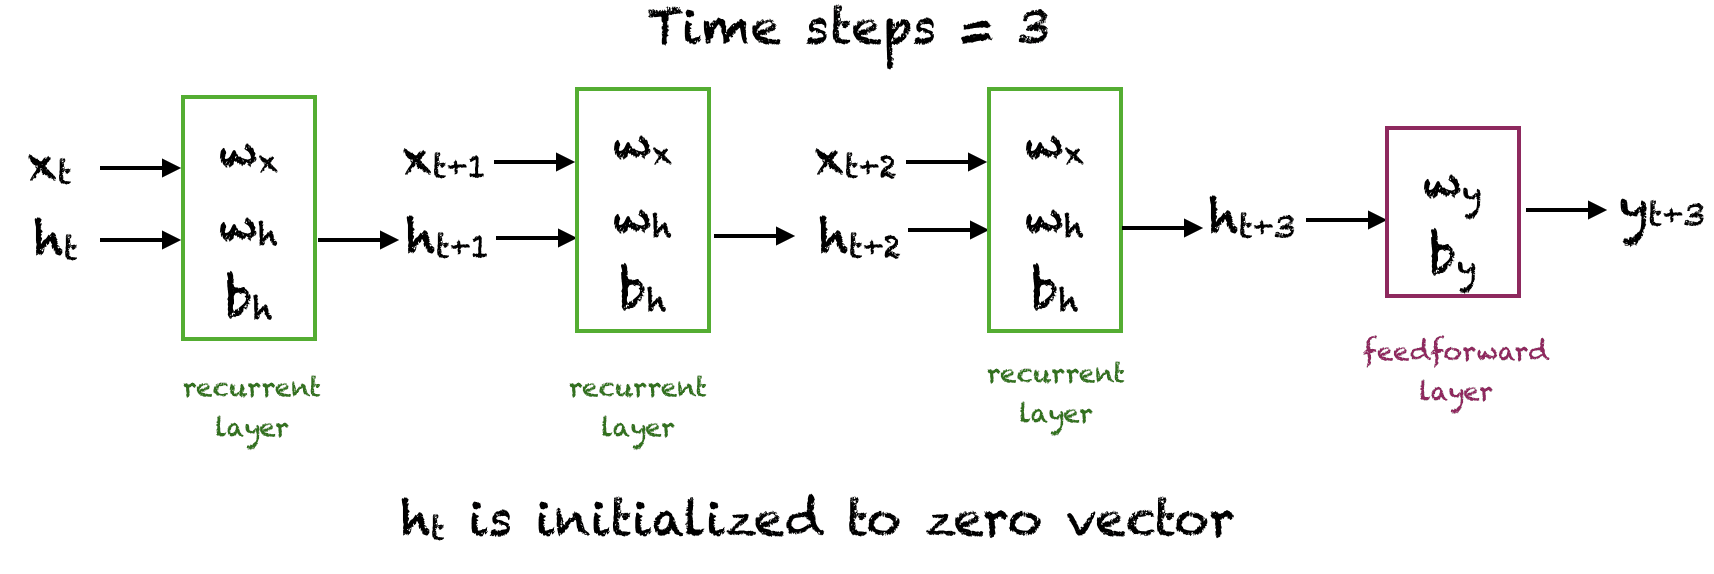

In [ ]:
# Do not run this cell or upload the PNG file and then run.
# Configuration of the simple RNN
from IPython.display import Image
Image("RNN_info_flow.png", width = 600, height = 300)

##**Implementing the MLP neural network**

In [ ]:
# Execute this cell or the RNN cell above or the ESN cell below. They are mutually exclusive.
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(80, activation=tf.nn.tanh),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(horizon, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')
train_predict = model.fit(X, y, epochs=100)
model.summary()

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 12/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 13/100
23/23 [=================

##**Implementing the echo state neural network (ESN)**

**d) Execute o notebook [PC1_Ativ6_RNN_MLP_ESN_TS.ipynb] para os dois casos de estudo, tomando RNN simples, ESN e MLP (6 execuções). Apresente os resultados apenas de uma dessas execuções.**

Resultado da execução no notebook.

In [ ]:
# Execute this cell or the RNN cell above or the MLP cell above. They are mutually exclusive.
!git clone https://github.com/cknd/pyESN.git
!cp /content/pyESN/pyESN.py .
from pyESN import ESN

Cloning into 'pyESN'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 1.17 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
model = ESN(n_inputs = time_steps,
          n_outputs = horizon,
          n_reservoir = 500,
          spectral_radius = 2,
          random_state=42)
model.fit(X,y);

In [ ]:
def print_error(trainY, testY, train_predict, test_predict,i):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('t+%d RMSE train: %.3f RMSE' % (i+1, train_rmse))
    print('t+%d RMSE test: %.3f RMSE' % (i+1, test_rmse))

# Make predictions
train_predict = model.predict(X)
test_predict = model.predict(Xt)

for i in range(horizon):
  if(horizon == 1):
    y1_pred = train_predict
    y1_pred_t = test_predict
    y1 = y
    y1_t = yt
  elif(horizon > 1):
    y1_pred = train_predict[:,i]
    y1_pred_t = test_predict[:,i]
    y1 = y[:,i]
    y1_t = yt[:,i]
  print_error(y1, y1_t, y1_pred, y1_pred_t,i)

t+1 RMSE train: 0.017 RMSE
t+1 RMSE test: 0.078 RMSE
t+2 RMSE train: 0.023 RMSE
t+2 RMSE test: 0.111 RMSE
t+3 RMSE train: 0.031 RMSE
t+3 RMSE test: 0.136 RMSE


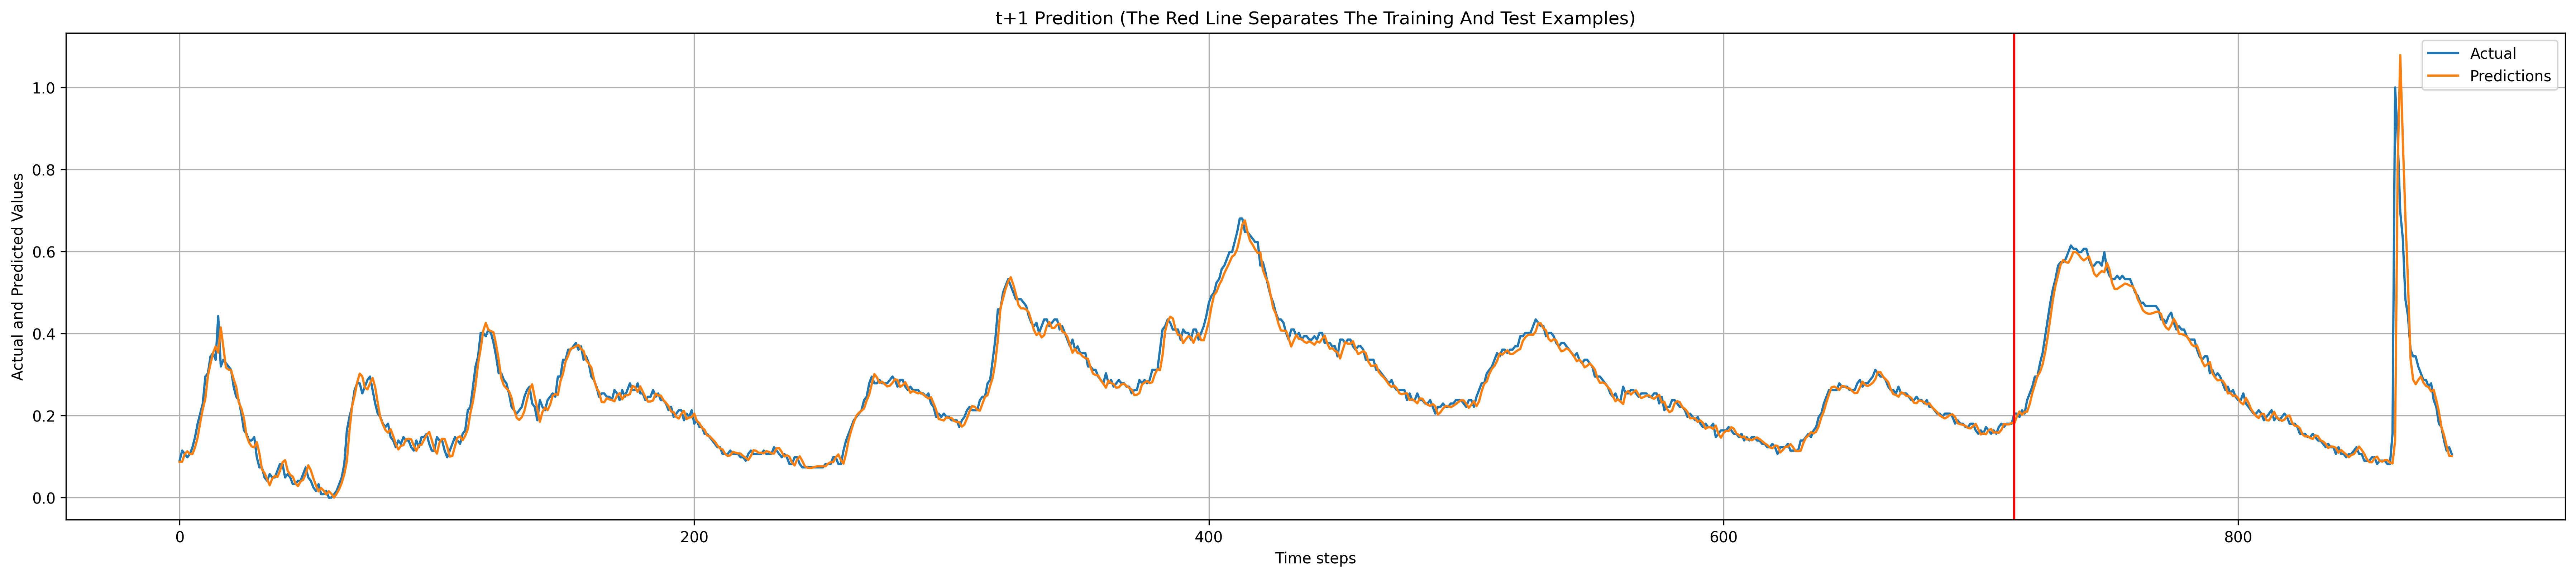

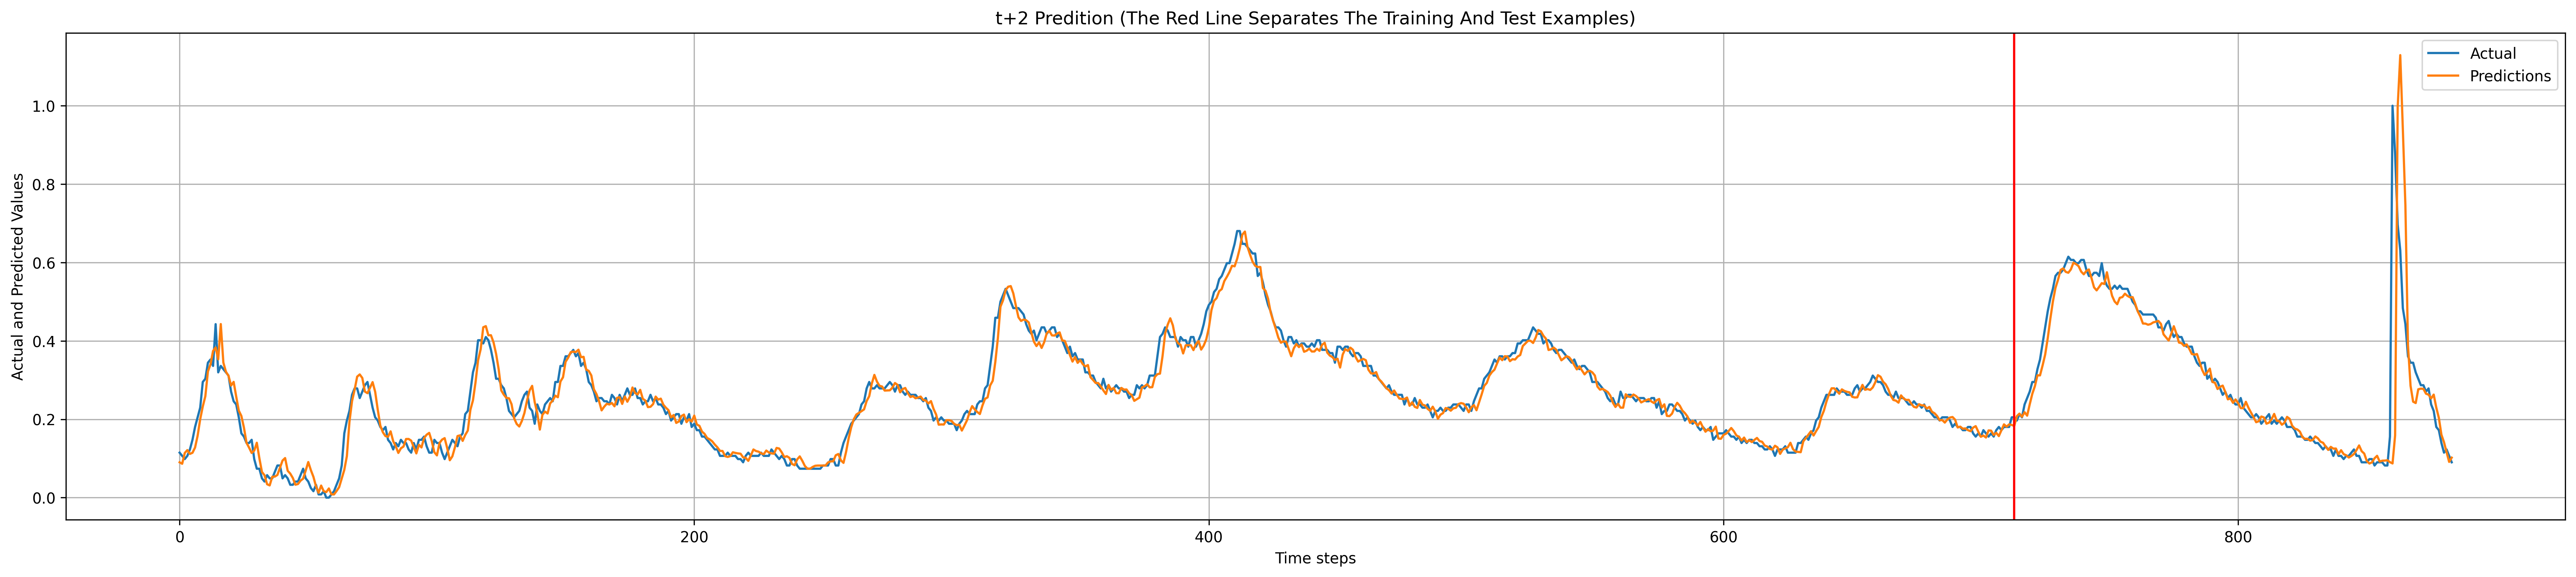

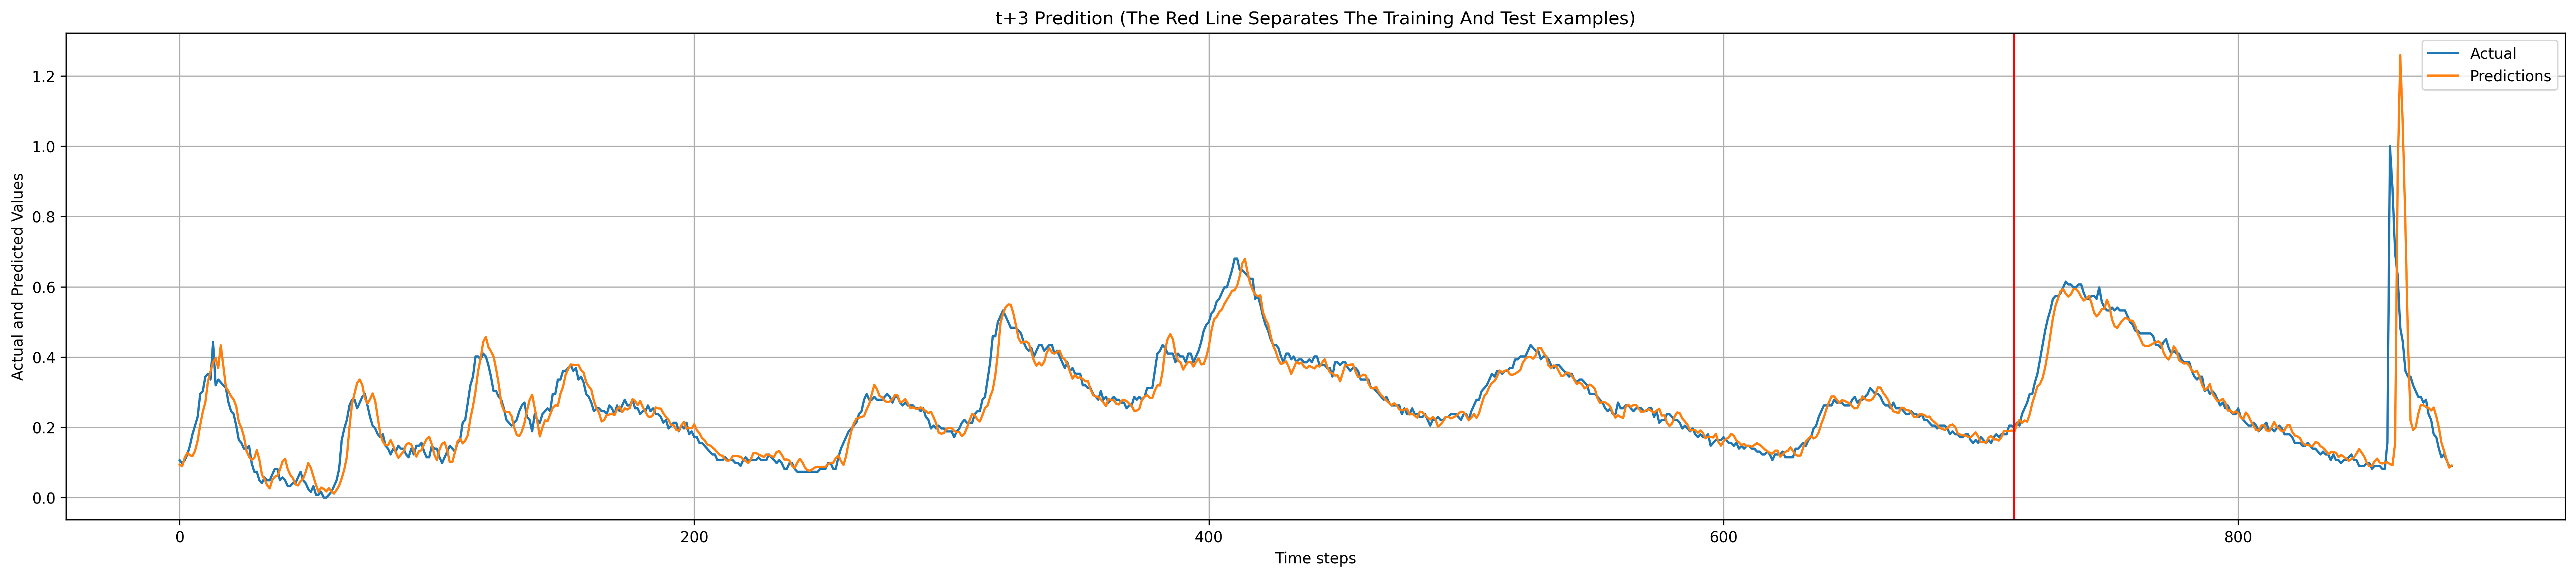

In [ ]:
# Plot the predictions together with the actual values
def plot_result(trainY, testY, train_predict, test_predict,i):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 6), dpi=300)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Time steps')
    plt.ylabel('Actual and Predicted Values')
    plt.title('t+%d Predition (The Red Line Separates The Training And Test Examples)' % (i+1))
    plt.grid(True)

for i in range(horizon):
  if(horizon == 1):
    y1_pred = train_predict
    y1_pred_t = test_predict
    y1 = y
    y1_t = yt
  elif(horizon > 1):
    y1_pred = train_predict[:,i]
    y1_pred_t = test_predict[:,i]
    y1 = y[:,i]
    y1_t = yt[:,i]
  plot_result(y1, y1_t, y1_pred, y1_pred_t,i)

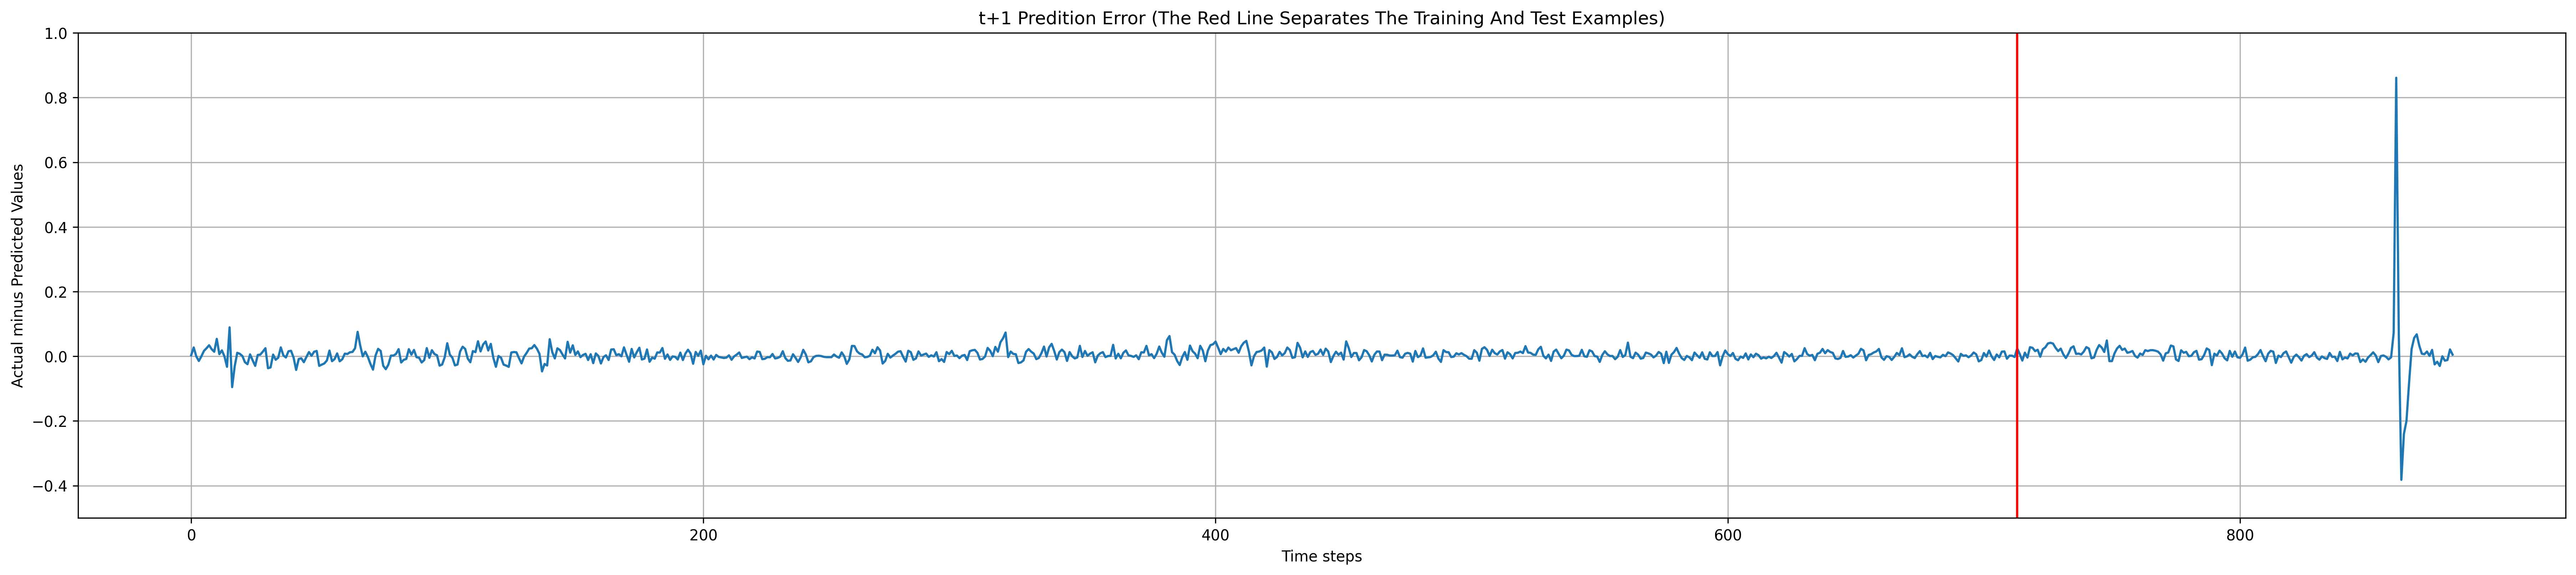

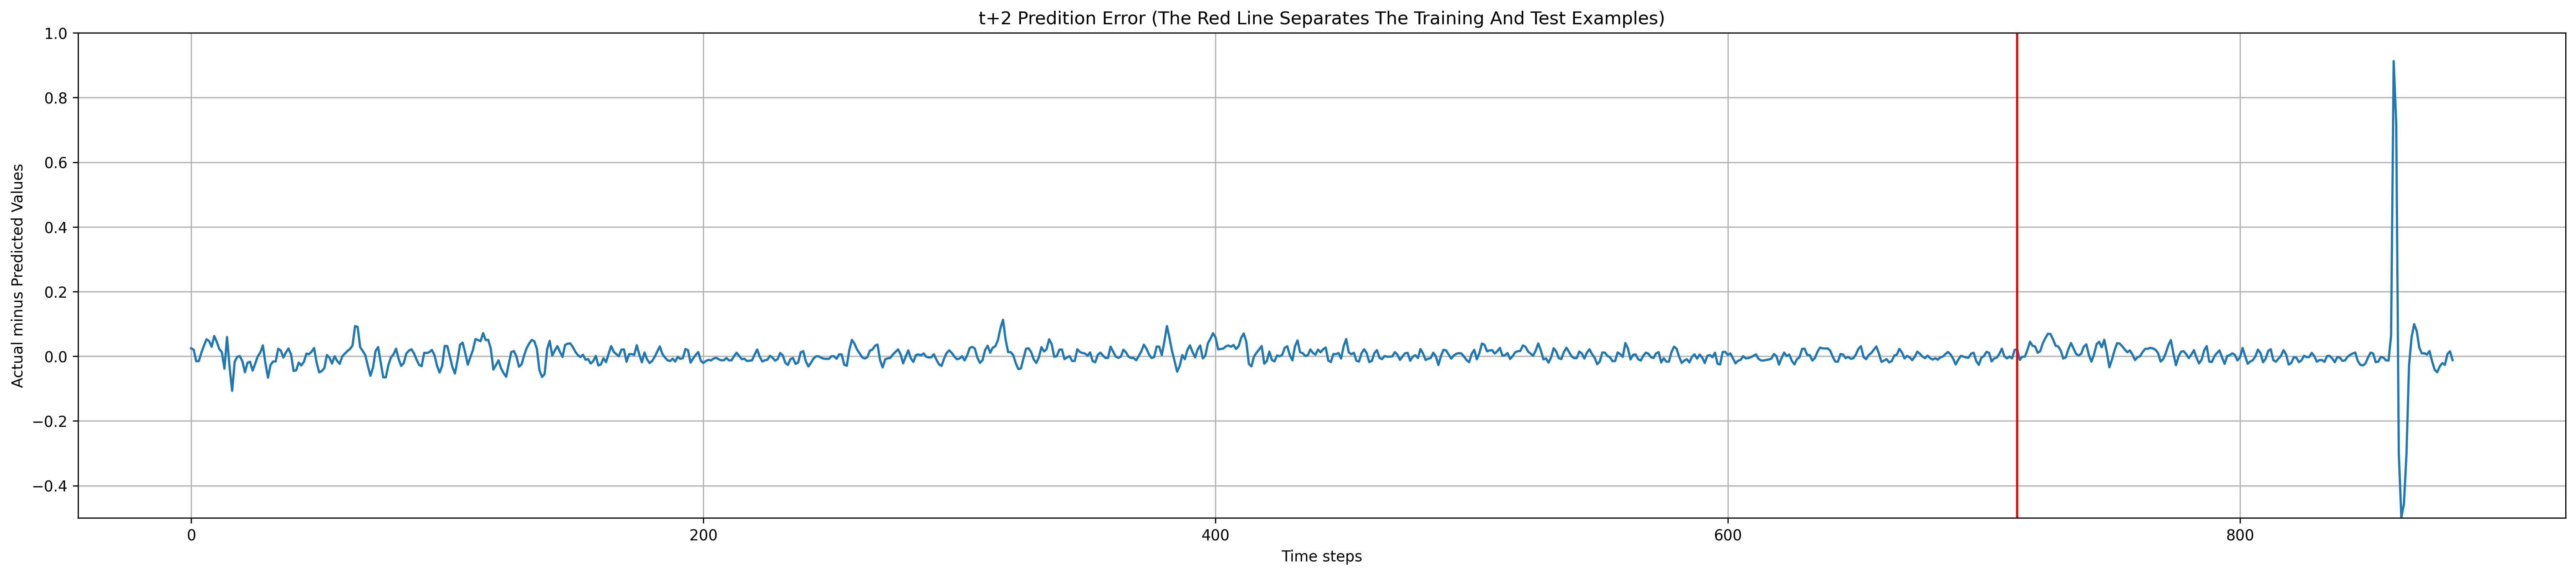

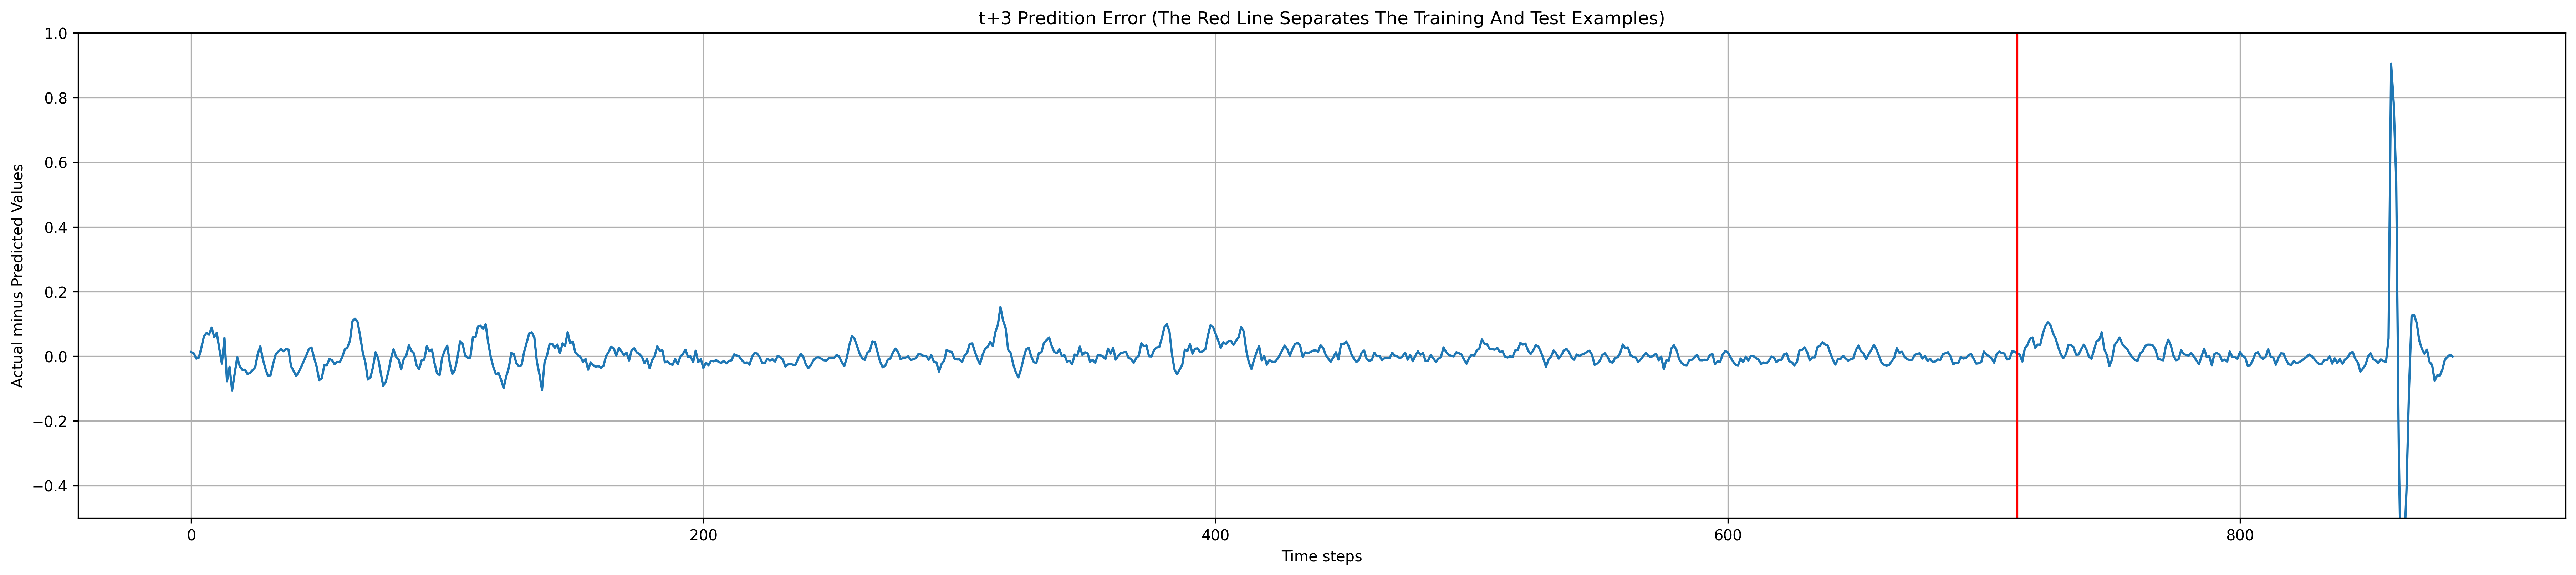

In [ ]:
# Plot the prediction error
def plot_result2(trainY, testY, train_predict, test_predict,i):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(30, 6), dpi=300)
    plt.plot(range(rows), actual - predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.xlabel('Time steps')
    plt.ylabel('Actual minus Predicted Values')
    plt.title('t+%d Predition Error (The Red Line Separates The Training And Test Examples)' % (i+1))
    plt.ylim(-0.5, +1.0) # Please, set the interval appropriately, considering all the graphs.
    plt.grid(True)

for i in range(horizon):
  if(horizon == 1):
    y1_pred = train_predict
    y1_pred_t = test_predict
    y1 = y
    y1_t = yt
  elif(horizon > 1):
    y1_pred = train_predict[:,i]
    y1_pred_t = test_predict[:,i]
    y1 = y[:,i]
    y1_t = yt[:,i]
  plot_result2(y1, y1_t, y1_pred, y1_pred_t,i)

In [ ]:
# Meaningful only for the simple RNN model (not for MLP or ESN)
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
print(wx.shape)
print(wh.shape)
print(bh.shape)
print(wy.shape)
print(by.shape)

(1, 30)
(30, 30)
(30,)
(30, 3)
(3,)


**e) Qual modelo de aprendizado (dentre as duas RNN e a MLP) levou a um melhor desempenho junto aos dados de teste?**

#####RLN:

t+1 RMSE train: 0.023 RMSE<br>
**t+1 RMSE test: 0.072 RMSE**<br>
t+2 RMSE train: 0.030 RMSE<br>
**t+2 RMSE test: 0.100 RMSE**<br>
t+3 RMSE train: 0.034 RMSE<br>
**t+3 RMSE test: 0.116 RMSE**<br>

---
####MLP:
t+1 RMSE train: 0.017 RMSE<br>
**t+1 RMSE test: 0.078 RMSE**<br>
t+2 RMSE train: 0.023 RMSE<br>
**t+2 RMSE test: 0.111 RMSE**<br>
t+3 RMSE train: 0.031 RMSE<br>
**t+3 RMSE test: 0.136 RMSE**<br>

A RNN ganha na série de desemprego e a MLP vence na série de manchas solares.